In [12]:
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
text = """
  Hrithik is the epitome of perfection with his long haircut, towering stature, and striking hazel-green eyes. A prolific Indian actor in numerous Bollywood films, he is globally renowned for his versatile roles, unmatchable dancing skills and attractive looks.

After having appeared in films as a child actor in the 1980s, Roshan made his film debut in a leading role in Kaho Naa... Pyaar Hai (2000) for which he earned Filmfare Awards for Best Actor and Best Male Debut. It was not just a new actor on the block, but a star was born. He became a romantic hero, an action hero and revolutionized the Hindi film industry in significant ways. Never before had any debutant become an overnight sensation of this kind.

After his debut film, he appeared in Karan Johar's family drama Kabhi Khushi Kabhi Gham (2001), which received immense love not just in India but even overseas.

"""

In [7]:
sentences = sent_tokenize(text)
for i, sentence in enumerate(sentences):
  print(f"{i}. {sentence}")

0. 
  Hrithik is the epitome of perfection with his long haircut, towering stature, and striking hazel-green eyes.
1. A prolific Indian actor in numerous Bollywood films, he is globally renowned for his versatile roles, unmatchable dancing skills and attractive looks.
2. After having appeared in films as a child actor in the 1980s, Roshan made his film debut in a leading role in Kaho Naa... Pyaar Hai (2000) for which he earned Filmfare Awards for Best Actor and Best Male Debut.
3. It was not just a new actor on the block, but a star was born.
4. He became a romantic hero, an action hero and revolutionized the Hindi film industry in significant ways.
5. Never before had any debutant become an overnight sensation of this kind.
6. After his debut film, he appeared in Karan Johar's family drama Kabhi Khushi Kabhi Gham (2001), which received immense love not just in India but even overseas.


In [10]:
for i in range(len(sentences)):
  sentences[i] = sentences[i].lower()
  sentences[i] = re.sub(r'\W', ' ', sentences[i])
  sentences[i] = re.sub('\s+', ' ', sentences[i])

for i, sentence in enumerate(sentences):
    print(f"{i}. {sentence}")

0.  hrithik is the epitome of perfection with his long haircut towering stature and striking hazel green eyes 
1. a prolific indian actor in numerous bollywood films he is globally renowned for his versatile roles unmatchable dancing skills and attractive looks 
2. after having appeared in films as a child actor in the 1980s roshan made his film debut in a leading role in kaho naa pyaar hai 2000 for which he earned filmfare awards for best actor and best male debut 
3. it was not just a new actor on the block but a star was born 
4. he became a romantic hero an action hero and revolutionized the hindi film industry in significant ways 
5. never before had any debutant become an overnight sensation of this kind 
6. after his debut film he appeared in karan johar s family drama kabhi khushi kabhi gham 2001 which received immense love not just in india but even overseas 


In [11]:
word2count = {}

for sentence in sentences:
  words = nltk.word_tokenize(sentence)
  for word in words:
    if word not in word2count:
      word2count[word] = 1
    else:
      word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered = {word: count for word, count in word2count.items() if word not in stop_words}
print(f"filtered words frequency vector :{filtered}")

filtered words frequency vector :{'hrithik': 1, 'epitome': 1, 'perfection': 1, 'long': 1, 'haircut': 1, 'towering': 1, 'stature': 1, 'striking': 1, 'hazel': 1, 'green': 1, 'eyes': 1, 'prolific': 1, 'indian': 1, 'actor': 4, 'numerous': 1, 'bollywood': 1, 'films': 2, 'globally': 1, 'renowned': 1, 'versatile': 1, 'roles': 1, 'unmatchable': 1, 'dancing': 1, 'skills': 1, 'attractive': 1, 'looks': 1, 'appeared': 2, 'child': 1, '1980s': 1, 'roshan': 1, 'made': 1, 'film': 3, 'debut': 3, 'leading': 1, 'role': 1, 'kaho': 1, 'naa': 1, 'pyaar': 1, 'hai': 1, '2000': 1, 'earned': 1, 'filmfare': 1, 'awards': 1, 'best': 2, 'male': 1, 'new': 1, 'block': 1, 'star': 1, 'born': 1, 'became': 1, 'romantic': 1, 'hero': 2, 'action': 1, 'revolutionized': 1, 'hindi': 1, 'industry': 1, 'significant': 1, 'ways': 1, 'never': 1, 'debutant': 1, 'become': 1, 'overnight': 1, 'sensation': 1, 'kind': 1, 'karan': 1, 'johar': 1, 'family': 1, 'drama': 1, 'kabhi': 2, 'khushi': 1, 'gham': 1, '2001': 1, 'received': 1, 'immens

In [13]:
print(list(word2count.items()))

[('hrithik', 1), ('is', 2), ('the', 4), ('epitome', 1), ('of', 2), ('perfection', 1), ('with', 1), ('his', 4), ('long', 1), ('haircut', 1), ('towering', 1), ('stature', 1), ('and', 4), ('striking', 1), ('hazel', 1), ('green', 1), ('eyes', 1), ('a', 6), ('prolific', 1), ('indian', 1), ('actor', 4), ('in', 8), ('numerous', 1), ('bollywood', 1), ('films', 2), ('he', 4), ('globally', 1), ('renowned', 1), ('for', 3), ('versatile', 1), ('roles', 1), ('unmatchable', 1), ('dancing', 1), ('skills', 1), ('attractive', 1), ('looks', 1), ('after', 2), ('having', 1), ('appeared', 2), ('as', 1), ('child', 1), ('1980s', 1), ('roshan', 1), ('made', 1), ('film', 3), ('debut', 3), ('leading', 1), ('role', 1), ('kaho', 1), ('naa', 1), ('pyaar', 1), ('hai', 1), ('2000', 1), ('which', 2), ('earned', 1), ('filmfare', 1), ('awards', 1), ('best', 2), ('male', 1), ('it', 1), ('was', 2), ('not', 2), ('just', 2), ('new', 1), ('on', 1), ('block', 1), ('but', 2), ('star', 1), ('born', 1), ('became', 1), ('romantic

In [14]:
df = pd.DataFrame(list(word2count.items()), columns=['word', 'frequency'])
print(df)

         word  frequency
0     hrithik          1
1          is          2
2         the          4
3     epitome          1
4          of          2
..        ...        ...
99    immense          1
100      love          1
101     india          1
102      even          1
103  overseas          1

[104 rows x 2 columns]


In [15]:
word_freq_df = df.sort_values(by='frequency', ascending=False)
print(f"word frequency dataset in descending order: {word_freq_df}")

word frequency dataset in descending order:          word  frequency
21         in          8
17          a          6
2         the          4
7         his          4
20      actor          4
..        ...        ...
99    immense          1
100      love          1
101     india          1
102      even          1
103  overseas          1

[104 rows x 2 columns]


Top 10 frequent words: ['in', 'a', 'the', 'his', 'and', 'actor', 'he', 'for', 'film', 'debut']
('in', 'a', 'the', 'his', 'and', 'actor', 'he', 'for', 'film', 'debut') (8, 6, 4, 4, 4, 4, 4, 3, 3, 3)


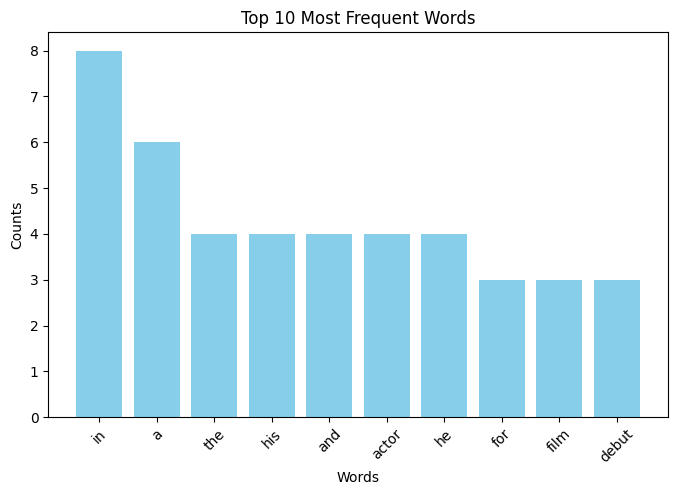

In [18]:
import heapq
import matplotlib.pylab as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

print(words, counts)

plt.figure(figsize=(8, 5))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()